# 目的

## 2枚の画像の色の違いを，PSNRと色差という二つの手法を用いて数値で評価する．

# 準備

In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ2B/day3"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/JKJ2B/day3
 3_2_image/   free_3_1_image/   image/       '情報工学実験IIB資料_python.ipynb '
 day3.ipynb   free_3_3_image/   multi_media


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math
import os
from matplotlib import pyplot as pyp


# 課題3-1　画質の評価

原画像と各画素における画素値の差が 1 および 5 の時の PSNR 値を求める.

In [ ]:
N = 1000

d_list = [1, 5] #画素値の差

for d in d_list:
  mse = pow(d, 2) * N * 3 / (3 * N)

  psnr = 10 * math.log10(pow(255, 2) / mse)

  print(psnr)

48.1308036086791
34.15140352195873


# 課題3-2　JPEGの出力画質


RGB 画像に対して JPEG 出力画質を変化させた時，どのように出力画像は変化するかを調べる.

In [ ]:
image = cv2.imread('./image/koukyo.JPG')

q_list = [1, 80]

for q in q_list:
  cv2.imwrite(f'./3_2_image/koukyo_q{q}.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, q])



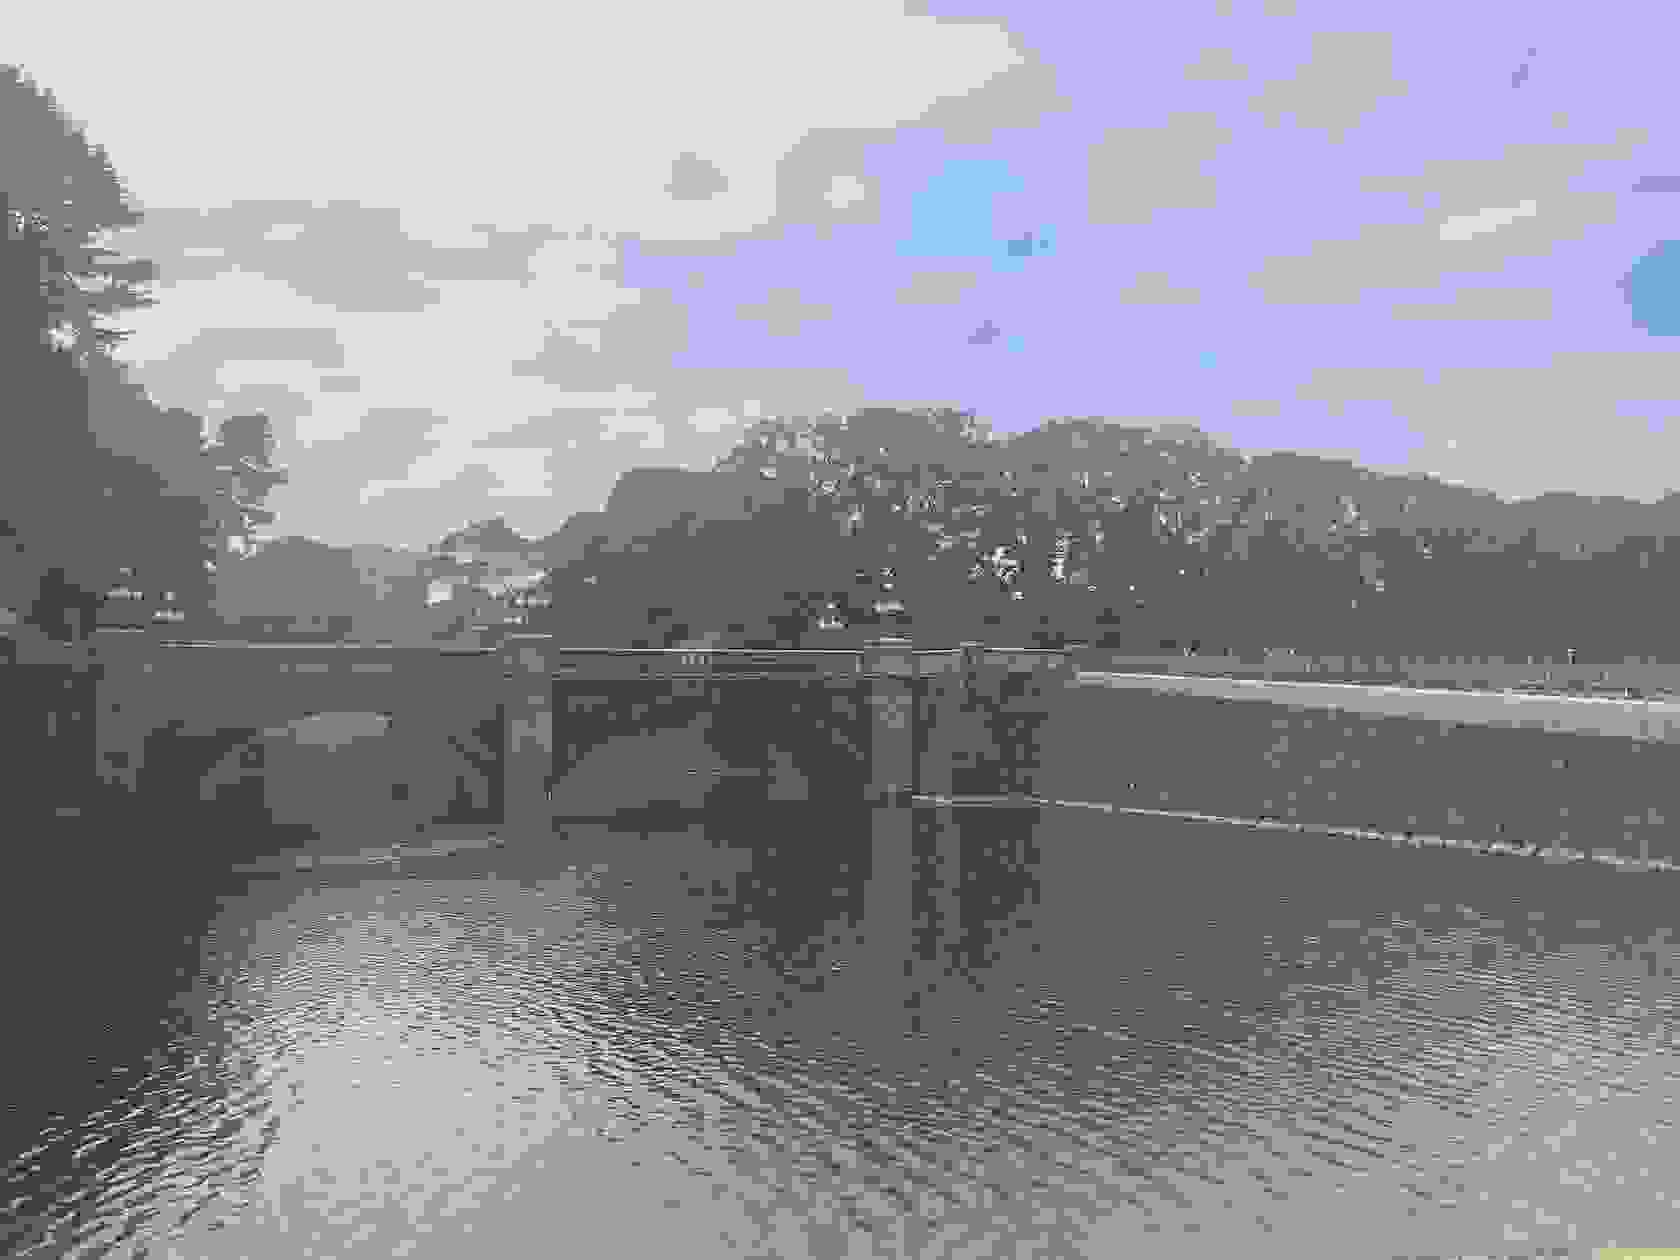

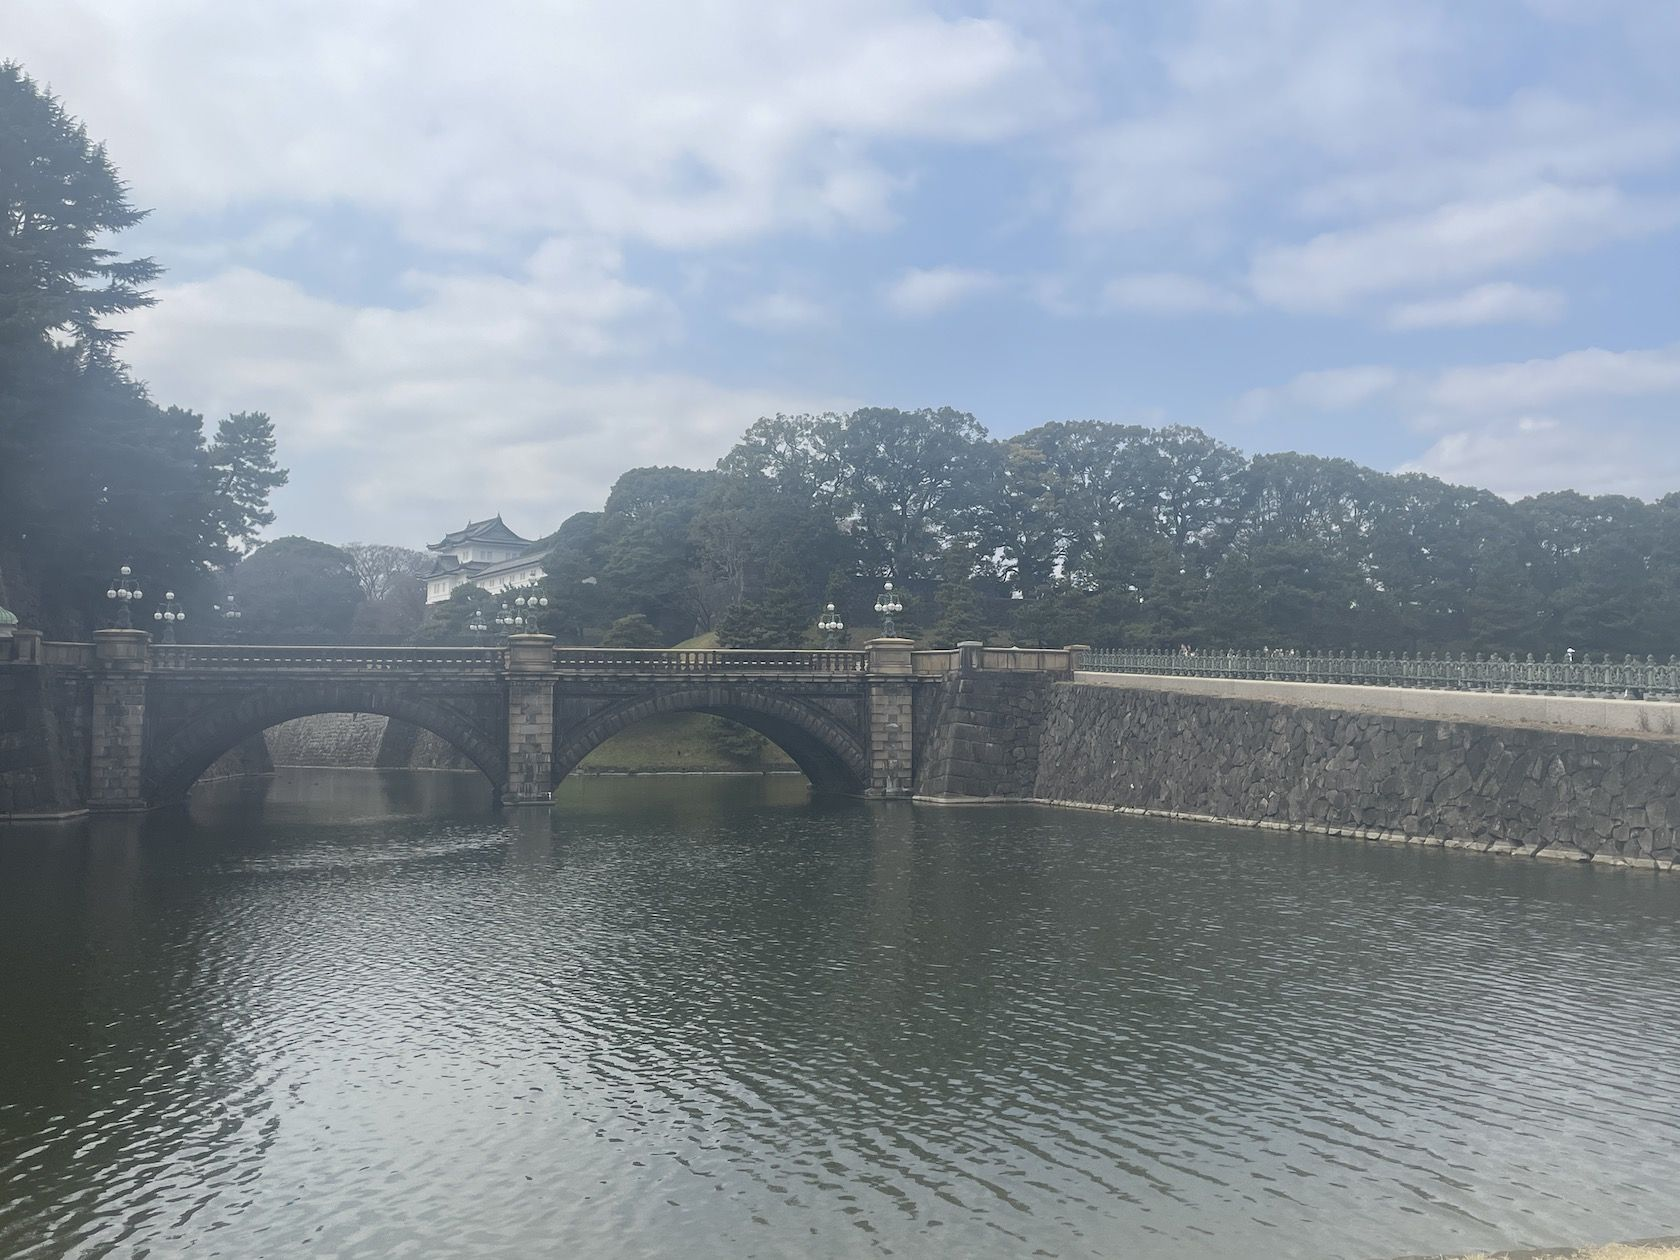

In [ ]:

for q in q_list:
  image = cv2.imread(f'./3_2_image/koukyo_q{q}.jpg')

  # 画像の表示
  cv2_imshow(image)

# 課題3-3　PSNR値の算出

課題3-2で出力された画像と原画像とのPSNR値を求める．

## PSNR値を求める関数

In [ ]:
def func_psnr(image_org, image_out):


  height, width, channel = image_org.shape

  sum_all = 0

  for h in range(0, height):
    for w in range(0, width):

      sum_pixel = 0

      for c in range(0, channel):
        sum_pixel += pow(float(image_org[h,w,c]) - float(image_out[h,w,c]), 2)

      sum_all += sum_pixel

  mse = sum_all / (3 * height * width)

  psnr = 10 * math.log10(pow(255, 2) / mse)


  return psnr

## MSE値を求める関数

In [ ]:
def func_mse(image_org, image_out):


  height, width, channel = image_org.shape

  sum_all = 0

  for h in range(0, height):
    for w in range(0, width):

      sum_pixel = 0

      for c in range(0, channel):
        sum_pixel += pow(float(image_org[h,w,c]) - float(image_out[h,w,c]), 2)

      sum_all += sum_pixel

  mse = sum_all / (3 * height * width)



  return mse

## 原画像とJPEG品質20の画像のPSNR値を求める

In [ ]:
# filename1 = './image/koukyo.JPG'
# filename2 = './3_2_image/koukyo_q20.jpg'

image_org = cv2.imread('./image/q100_s.jpg')
image_out = cv2.imread('./image/noise_s.jpg')

psnr = func_psnr(image_org, image_out)

print(f'PSNR値は {psnr}')


PSNR値は 25.180375384813548


# 課題3-4





## 画質とPSNRの関係

JPEG 出力画質を 1，5，10，20，40，80 と変化させて出力した画像それぞれと，原画像との PSNR 値を求める．

In [ ]:

image_org = cv2.imread('./image/koukyo.JPG')

mse_list = []
psnr_list = []

q_list = [1, 5, 10, 20, 40, 80]

for q in q_list:

  image_out = cv2.imread(f'./3_2_image/koukyo_q{q}.jpg')

  mse = func_mse(image_org, image_out)
  psnr = func_psnr(image_org, image_out)
  mse_list.append(mse)
  psnr_list.append(psnr)


print(mse_list)
print(psnr_list)


[366.6862961388259, 205.36157801083397, 102.15099017384732, 53.600900415721846, 29.695147864701436, 10.131235670194004]
[22.48785681129554, 25.005611680465346, 28.03837780159318, 30.839082756099366, 33.40394868713566, 38.07417942948986]


横軸に画質，縦軸にPSNRのグラフを作成する．

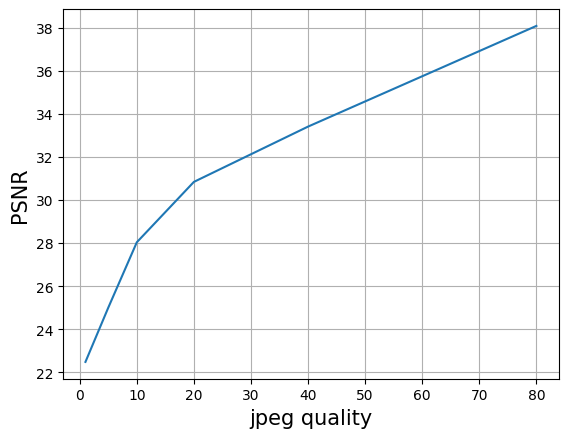

In [ ]:
image_org = cv2.imread('./image/koukyo.JPG')


psnr_list = [22.48785681129554, 25.005611680465346, 28.03837780159318, 30.839082756099366, 33.40394868713566, 38.07417942948986]
q_list = [1, 5, 10, 20, 40, 80]





pyp.xlabel("jpeg quality", {"fontsize":15})
pyp.ylabel("PSNR", {"fontsize":15})
pyp.plot(q_list, psnr_list)
pyp.grid()

pyp.show()

## 画質とJPEG圧縮後のファイルサイズの関係

横軸に画質，縦軸にJPEG圧縮後のファイルサイズのグラフを作成する．

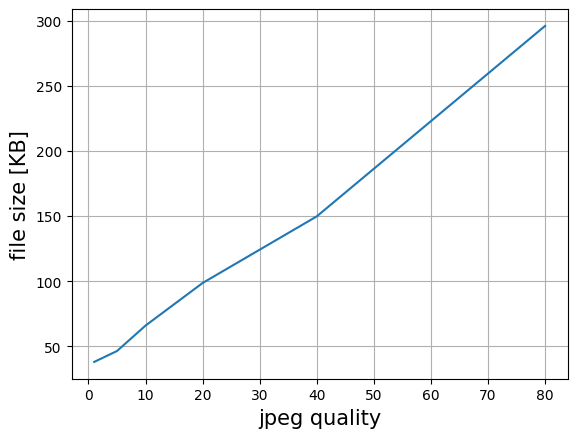

In [ ]:
q_list = [1, 5, 10, 20, 40, 80]  #jpeg quality

size_list = [os.path.getsize(f'./3_2_image/koukyo_q{q}.jpg') / 1024 for q in q_list]


pyp.xlabel("jpeg quality", {"fontsize":15})
pyp.ylabel("file size [KB]", {"fontsize":15})
pyp.plot(q_list, size_list)

pyp.grid()
pyp.show()



# 課題3-5　色差の算出

In [ ]:
Xn = 95.05
Yn = 100
Zn = 108.89



def func(t):
  if t > 0.008856:
    return pow(t, 1/3)
  else:
    return 7.7871 * t + 16 / 116


# image_org = cv2.imread('./image/q100_s.jpg')
# image_out = cv2.imread('./image/noise_s.jpg')


def color_diff(image_org, image_out):

  image_bgr = cv2.split(image_org)

  B_L = [pow(i / 255, 2.2) for i in image_bgr[0].flatten()]
  G_L = [pow(i / 255, 2.2) for i in image_bgr[1].flatten()]
  R_L = [pow(i / 255, 2.2) for i in image_bgr[2].flatten()]

  X = [100 * (0.4124 * r_L + 0.3576 * g_L + 0.1805 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]
  Y = [100 * (0.2126 * r_L + 0.7152 * g_L + 0.0722 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]
  Z = [100 * (0.0193 * r_L + 0.1192 * g_L + 0.9504 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]

  L_org = [116 * func(y / Yn) - 16 for y in Y]
  a_org = [500 * (func(x / Xn) - func(y / Yn)) for x, y in zip(X, Y)]
  b_org = [200 * (func(y / Yn) - func(z / Zn)) for y, z in zip(Y, Z)]




  image_bgr = cv2.split(image_out)

  B_L = [pow(i / 255, 2.2) for i in image_bgr[0].flatten()]
  G_L = [pow(i / 255, 2.2) for i in image_bgr[1].flatten()]
  R_L = [pow(i / 255, 2.2) for i in image_bgr[2].flatten()]

  X = [100 * (0.4124 * r_L + 0.3576 * g_L + 0.1805 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]
  Y = [100 * (0.2126 * r_L + 0.7152 * g_L + 0.0722 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]
  Z = [100 * (0.0193 * r_L + 0.1192 * g_L + 0.9504 * b_L) for r_L, g_L, b_L in zip(R_L, G_L, B_L)]

  L_out = [116 * func(y / Yn) - 16 for y in Y]
  a_out = [500 * (func(x / Xn) - func(y / Yn)) for x, y in zip(X, Y)]
  b_out = [200 * (func(y / Yn) - func(z / Zn)) for y, z in zip(Y, Z)]


  L_diff_sqr= [pow(L2 - L1, 2) for L2, L1 in zip(L_org, L_out)]
  a_diff_sqr = [pow(a2 - a1, 2) for a2, a1 in zip(a_org, a_out)]
  b_diff_sqr = [pow(b2 - b1, 2) for b2, b1 in zip(b_org, b_out)]



  E = [math.sqrt(i + j + k) for i, j, k in zip(L_diff_sqr, a_diff_sqr, b_diff_sqr)]

  return sum(E) / len(E)


JPEG 出力画質を 1，5，10，20，40，80 と変化させて出力した画像それぞれと，原画像との 色差を求める

In [ ]:
image_org = cv2.imread('./image/koukyo.JPG')

q_list = [1, 5, 10, 20, 40, 80]

y_list = []

for q in q_list:

  image_out = cv2.imread(f'./3_2_image/koukyo_q{q}.jpg')


  value = color_diff(image_org, image_out)
  y_list.append(value)

print(y_list)





[10.08510262653387, 7.560382500660261, 5.128598015475128, 3.261408128057364, 2.1059294719567054, 1.1829374210085295]


# 必須課題3-6

## 画質と色差の関係

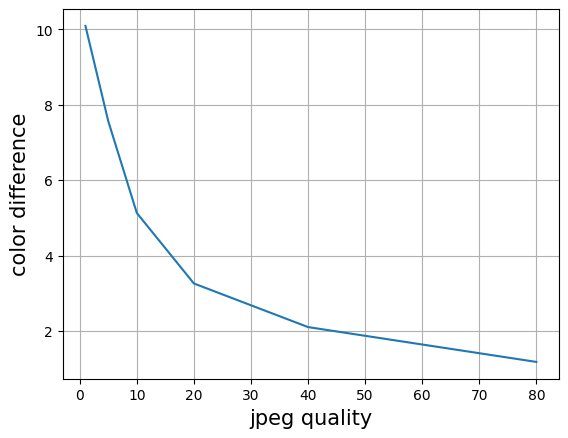

In [ ]:
x_list = [1, 5, 10, 20, 40, 80]  #jpeg quality

y_list = [10.08510262653387, 7.560382500660261, 5.128598015475128, 3.261408128057364, 2.1059294719567054, 1.1829374210085295] #color differences

pyp.xlabel("jpeg quality", {"fontsize":15})
pyp.ylabel("color difference", {"fontsize":15})
pyp.plot(x_list, y_list)

pyp.grid()
pyp.show()

## 画質とJPEG圧縮後のファイルサイズの関係

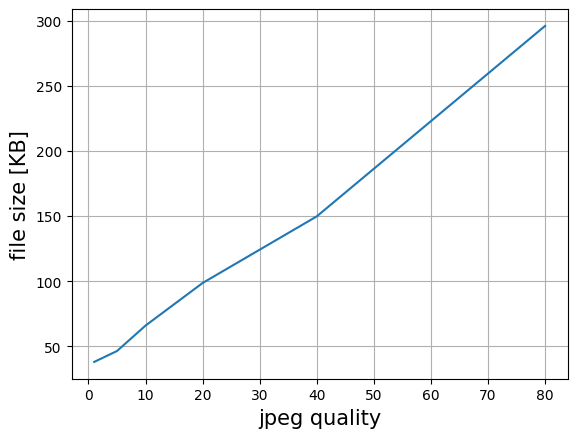

In [ ]:
q_list = [1, 5, 10, 20, 40, 80]  #jpeg quality

size_list = [os.path.getsize(f'./3_2_image/koukyo_q{q}.jpg') / 1024 for q in q_list]


pyp.xlabel("jpeg quality", {"fontsize":15})
pyp.ylabel("file size [KB]", {"fontsize":15})
pyp.plot(q_list, size_list)

pyp.grid()
pyp.show()
